# TORCphysics Example 1.: Basic Gene Circuit Simulation and Analysis

## Overview
This notebook demonstrates three basic examples using TORCphysics to analyse a system composed of two genes surrounded by barriers.

Each example includes:
- Running a single simulation
- Generating CSV output files
- Loading, visualizing and plotting results

## Gene Circuit Structure
We have a system composed by two genes in a tandem orientation in the form of:
X________-------left------>________------right------>________X

where X's indicate the surrounding barriers and -----> a gene pointing to the right.
We refer to the genes as 'left' and 'right'.

## Scenarios

### 1.1. Stochastic Transcription with no topoisomerases
- Stochastic transcription initiation with specific rates
- Uniform elongation (no RNAP stalling)
- No topoisomerase activity (global supercoiling does not change)

### 1.2. Supercoiling-Dependent Transcription Initiation with Continuous Topoisomerase activity
- Supercoiling-dependent transcription initiation (modulated by a sigmoid function)
- Uniform elongation
- Continuous topoisomerase activity

### 1.3.1 Realistic Model: Multi-Stage Supercoiling-Dependent Transcription with Stochastic Topoisomerase activity.
- Supercoiling-dependent stages initiation - modulated through various stages of transcription, Closed Complex -> Open Complex -> Elongation
- Torque-dependent RNAP elongation with stalling capability
- Stochastic topoisomerase binding
- Topoisomerase I follows transcribing RNAPs

### 1.3.2 Realistic Model (Accelerated): Multi-Stage Supercoiling-Dependent Transcription with Continuous Topoisomerase activity.
- Supercoiling-dependent stages initiation - modulated through various stages of transcription, Closed Complex -> Open Complex -> Elongation
- Torque-dependent RNAP elongation with stalling capability
- Continuous topoisomerase activity (no binding)



In [1]:
# Load modules
from TORCphysics import Circuit
from TORCphysics import visualization as vs
from TORCphysics import analysis as an
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example 1.1.
## Stochastic Transcription with no topoisomerases
- Stochastic transcription initiation with specific rates
- Uniform elongation (no RNAP stalling)
- No topoisomerase activity (global supercoiling does not change)

- Transcription is modelled using the PoissonBinding model, where transcription initiation occurs randomly with rate k_on described as a Poisson process (see sites_1.csv)


In [2]:
# Produce simulation
# -----------------------------------------------------------------
# Simulation conditions
circuit_filename = 'circuit.csv'
sites_filename = 'sites_1.csv'
enzymes_filename = None  # This input is optional, no enzymes_file means that nothing is bound
environment_filename = 'environment_1.csv'
output_prefix = 'output1'
frames = 2000
series = True
continuation = False
dt = 1

# Initialize circuit with the initial conditions
my_circuit = Circuit(circuit_filename, sites_filename, enzymes_filename, environment_filename,
                     output_prefix, frames, series, continuation, dt)
# Print general information
my_circuit.print_general_information()
# And run simulation
my_circuit.run()


Running simulation
Linear structure
Running 2000 frames on system composed of 6000 bp
Initial supercoiling density: 0.0
Initial twist: 0.0
Number of sites: 3
Initial number of bound enzymes: 2
Number of environmentals: 1
Random seed: 5804859112682173626


In [3]:
# Load dataframes
sites_df = pd.read_csv(my_circuit.name+'_'+output_prefix+'_sites_df.csv', sep=',')
enzymes_df = pd.read_csv(my_circuit.name+'_'+output_prefix+'_enzymes_df.csv', sep=',')
environment_df = pd.read_csv(my_circuit.name+'_'+output_prefix+'_environment_df.csv', sep=',')

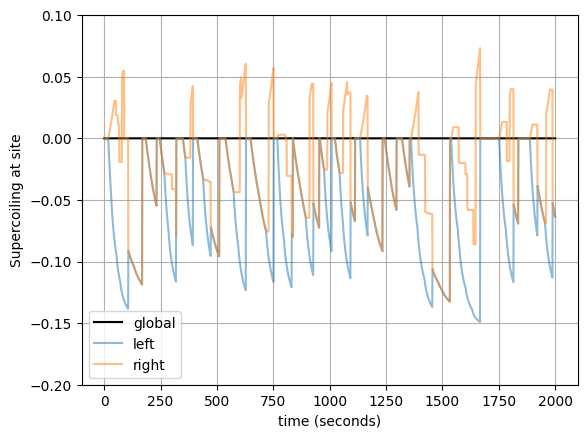

In [4]:
# Plot supercoiling profiles
vs.plot_supercoiling_profiles(my_circuit, sites_df)#, only_global=True)

# Global supercoiling refers to the total amount of supercoiling in the system.
# In the abscense of topoisomerase, it shouldn't change.
# Supercoiling at the gene refers to the superhelical level at the start site (promoter).
# It is usually highly dynamic in the presence of RNAPs.

In [5]:
# Calculate production rate, defined as the amount of transcripts produced per second.
gene_names = ['left', 'right']
for gene_name in gene_names:
    mask = environment_df['name'] == gene_name
    transcripts = environment_df[mask]['concentration'].iloc[-1]
    print(gene_name + ' gene production rate: ' + str(transcripts/(frames*dt)) +' transcript/seconds')
print('Is it close to the defined rates? (left gene 0.02, right gene 0.03)')


left gene production rate: 0.017 transcript/seconds
right gene production rate: 0.029 transcript/seconds
Is it close to the defined rates? (left gene 0.02, right gene 0.03)


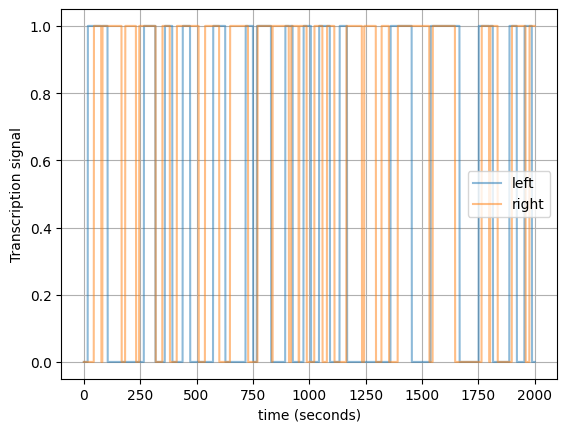

In [6]:
# We can also study the system by treating transcription as signals.
# We can use the visualization module to create signal profiles, where each rectangular pulse indicates if transcription is taking place.
vs.plot_signal_profiles(my_circuit=my_circuit, sites_df=sites_df, site_type='gene')

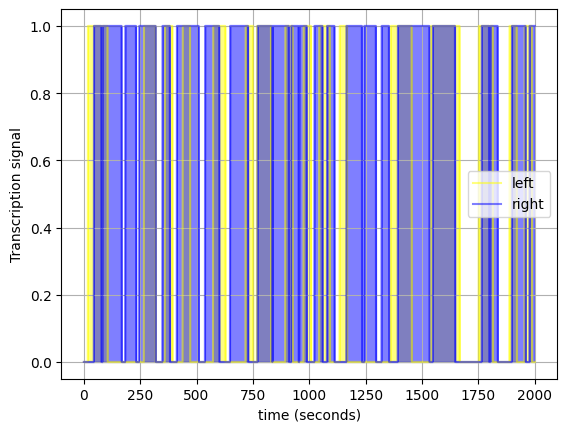

In [7]:
# We can choose gene colors as well!
gene_colors = {'left': 'yellow', 'right': 'blue'}
vs.plot_signal_profiles(my_circuit=my_circuit, sites_df=sites_df, site_type='gene', colors=gene_colors)


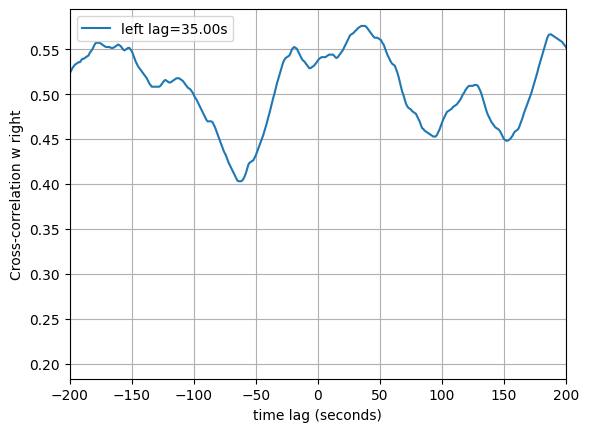

In [8]:
# We can also calculate cross-correlation between the genes (sites)
# But since transcription occurs randomly, this plot does not tell much information
vs.plot_cross_correlation_with_site(my_circuit, sites_df, ref_name='right')

In [9]:
# OPTIONAL (Uncomment to try): With the visualization module, we can create animations to visualize our simulated system.
# This may take a few minutes...
#vs.create_animation_linear_artist(my_circuit, sites_df, enzymes_df, environment_df, 'animation_1', out_format='.mp4', site_colours=gene_colors)

# Example 1.2.

## Supercoiling-dependent transcription initiation with Continuous Topoisomerase activity
- Supercoiling-dependent transcirption initiation (modulated by a sigmoid function)
- Uniform elongation
- Continuous topoisomerase activity

Transcription is modelled using the MaxMinPromoterBinding model, where transcription initiation is modulated with a sigmoid function and k_on indicates the maximum rate (see sites_2.csv).
Topoisomerase activity is modulated with a continuous model where action of topoisomrases linearly depend on the topoisomerase concentration (see environment_2.csv)

In [10]:
# Produce simulation - Let's re-use the same variables
# -----------------------------------------------------------------
# Simulation conditions
circuit_filename = 'circuit.csv'
sites_filename = 'sites_2.csv'  # This one contains transcription initiation modulated by supercoiling
enzymes_filename = None  # This input is optional, no enzymes_file means that nothing is bound
environment_filename = 'environment_2.csv'  # This one contains uniform RNAPs and topoisomerases acting continously
output_prefix = 'output2'
frames = 2000
series = True
continuation = False
dt = 1

# Initialize circuit with the initial conditions
my_circuit = Circuit(circuit_filename, sites_filename, enzymes_filename, environment_filename,
                     output_prefix, frames, series, continuation, dt)
# Print general information
my_circuit.print_general_information()
my_circuit.run()


Running simulation
Linear structure
Running 2000 frames on system composed of 6000 bp
Initial supercoiling density: 0.0
Initial twist: 0.0
Number of sites: 5
Initial number of bound enzymes: 2
Number of environmentals: 3
Random seed: 5804859112682173626


In [11]:
# Load dataframes
sites_df = pd.read_csv(my_circuit.name+'_'+output_prefix+'_sites_df.csv', sep=',')
enzymes_df = pd.read_csv(my_circuit.name+'_'+output_prefix+'_enzymes_df.csv', sep=',')
environment_df = pd.read_csv(my_circuit.name+'_'+output_prefix+'_environment_df.csv', sep=',')

left gene production rate: 0.0455 transcript/seconds
right gene production rate: 0.084 transcript/seconds
Is it close to the defined rates? (left gene 0.05, right gene 0.8)


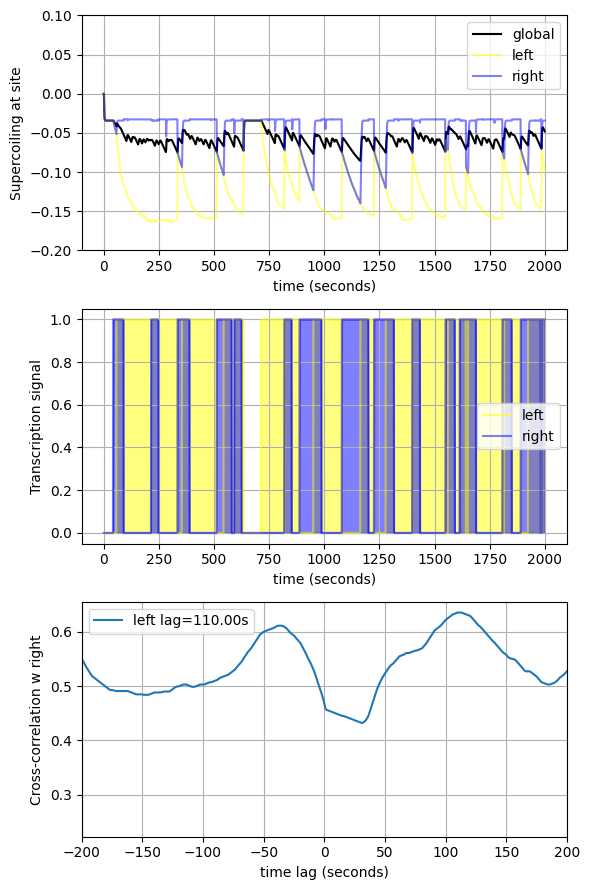

In [12]:
# This time, let's put all the plots in one figure
gene_names = ['left', 'right']
gene_colors = {'left': 'yellow', 'right': 'blue'}
fig, axs = plt.subplots(3, figsize=(6,9), tight_layout=True)

vs.plot_supercoiling_profiles(my_circuit, sites_df, colors=gene_colors, axs=axs[0])#, only_global=True)
vs.plot_signal_profiles(my_circuit=my_circuit, sites_df=sites_df, site_type='gene', colors=gene_colors, axs=axs[1])
vs.plot_cross_correlation_with_site(my_circuit, sites_df, ref_name='right', axs=axs[2])

# And let's calculate the production rate:
for gene_name in gene_names:
    mask = environment_df['name'] == gene_name
    transcripts = environment_df[mask]['concentration'].iloc[-1]
    print(gene_name + ' gene production rate: ' + str(transcripts/(frames*dt)) +' transcript/seconds')
print('Is it close to the defined rates? (left gene 0.05, right gene 0.8)')

Does the system look more coordinated now that transcription is supercoiling dependent?

Here are some observations:
- This time, the global supercoiling is not constant and has physiological values around -0.05
- Both the supercoiling and signal profiles show that when the right (blue) gene is transcribed, the left one (yellow) is promoted, but when the left is being transcribed, initiation on the right gene is repressed.
- Both genes seem more correlated now, but a clear pattern is not visible (a single simulation is not enough).

# Example 1.3.1.
## Realistic Model: Multi-Stage Supercoiling-Dependent Transcription with Stochastic Topoisomerase activity.
- Supercoiling-dependent stages initiation - modulated through various stages of transcription, Closed Complex -> Open Complex -> Elongation
- Torque-dependent RNAP elongation with stalling capability
- Stochastic topoisomerase binding
- Topoisomerase I follows transcribing RNAPs

Transcription is modeled using the GaussianBinding model + RNAPStagesStallv2 effect + RNAPStagesSimpleUnbindingv2 unbinding models, where transcription initiation is modulated through various stages (closed complex, open complex, elongation) and RNAPs may stall due to supercoils (see sites_3.csv).
Topoisomerase activity is modulated with a stochastic model where the action of topoisomrases linearly depend on the topoisomerase concentration (see environment_3.csv).

Due to the stochastic activity of topoisomerase, this type of simulations may increase computation times considerably.


In [13]:
# Produce simulation - Let's re-use the same variables
# -----------------------------------------------------------------
# Simulation conditions
circuit_filename = 'circuit.csv'
sites_filename = 'sites_3.csv'
enzymes_filename = None
environment_filename = 'environment_3.csv'  # This one contains stalled RNAP model and stochastic topoisomerase activity/binding
output_prefix = 'output3'
frames = 3600 * 2
series = True
continuation = False
dt = 1.0

# Initialize circuit with the initial conditions
my_circuit = Circuit(circuit_filename, sites_filename, enzymes_filename, environment_filename,
                     output_prefix, frames, series, continuation, dt)
# Print general information - This time, the DNA is partitioned into grids to simulate the stochastic binding of topoisomerases
my_circuit.print_general_information()
my_circuit.run()


Running simulation
Linear structure
Running 7200 frames on system composed of 6000 bp
Initial supercoiling density: 0.0
Initial twist: 0.0
Number of sites: 505
Initial number of bound enzymes: 2
Number of environmentals: 3
Random seed: 5804859112682173626


/home/victor/Documents/temporal/TORCphysics/TORCphysics/src/binding_model.py:1304: RuntimeWarning: overflow encountered in exp
  b = 1 + np.exp(b1)


In [14]:
# Load dataframes
sites_df = pd.read_csv(my_circuit.name+'_'+output_prefix+'_sites_df.csv', sep=',')
enzymes_df = pd.read_csv(my_circuit.name+'_'+output_prefix+'_enzymes_df.csv', sep=',')
environment_df = pd.read_csv(my_circuit.name+'_'+output_prefix+'_environment_df.csv', sep=',')

left gene production rate: 0.0015277777777777779 transcript/seconds
right gene production rate: 0.0016666666666666668 transcript/seconds


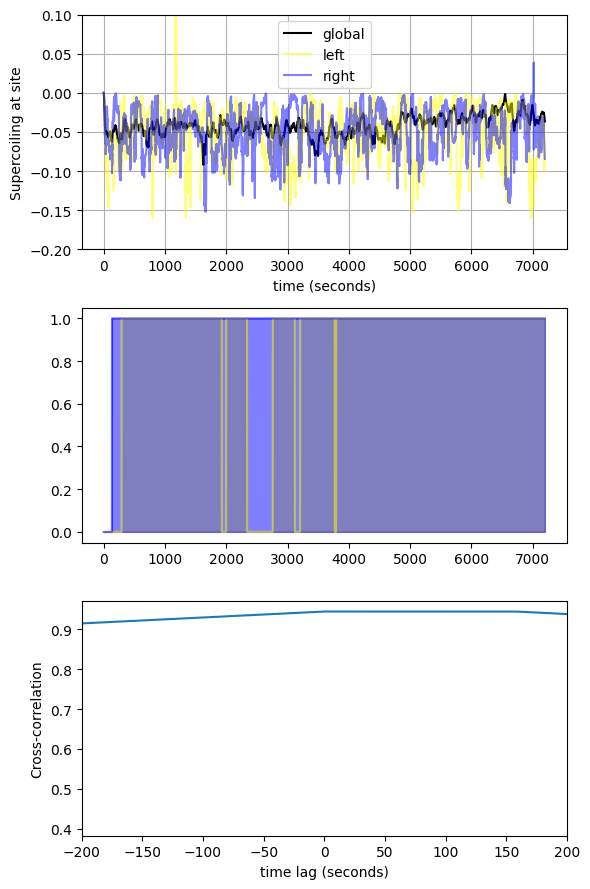

In [15]:
# Load dataframes
sites_df = pd.read_csv(my_circuit.name+'_'+output_prefix+'_sites_df.csv', sep=',')
enzymes_df = pd.read_csv(my_circuit.name+'_'+output_prefix+'_enzymes_df.csv', sep=',')
environment_df = pd.read_csv(my_circuit.name+'_'+output_prefix+'_environment_df.csv', sep=',')

# This time, let's put all the plots in one figure
gene_names = ['left', 'right']
gene_colors = {'left': 'yellow', 'right': 'blue'}
fig, axs = plt.subplots(3, figsize=(6,9), tight_layout=True)

# Plot supercoiling
vs.plot_supercoiling_profiles(my_circuit, sites_df, colors=gene_colors, axs=axs[0])#, only_global=True)

# Since RNAPs may stay in closed complex or open complex for considerable time, we now use the analysis module (an) to calculate build the elongation signals to calculate the cross-correlation manually.
# Plot elongation signal
signals = an.build_elongation_signal_stages(enzymes_df, gene_names)
time = np.arange(0, my_circuit.dt * len(signals[0]), my_circuit.dt)
y_0s = time * 0.0
for i, signal in enumerate(signals):
    name = gene_names[i]
    axs[1].plot(time, signal, color=gene_colors[name], label=name, alpha=0.5)
    axs[1].fill_between(time, signal, y_0s, color=gene_colors[name], alpha=0.5)

# Plot cross correlation
crossmatrix, lag =  an.cross_correlation_hmatrix(signals, dt)
my_label = f' lag={lag[np.argmax(crossmatrix[0, 1, :])]:.2f}s'
axs[2].plot(lag, crossmatrix[0, 1, :], label=my_label)
axs[2].set_ylabel('Cross-correlation')
axs[2].set_xlabel('time lag (seconds)')
axs[2].set_xlim(-200, 200)

#vs.plot_cross_correlation_with_site(my_circuit, sites_df, ref_name='left', axs=axs[2])

# And let's calculate the production rate:
for gene_name in gene_names:
    mask = environment_df['name'] == gene_name
    transcripts = environment_df[mask]['concentration'].iloc[-1]
    print(gene_name + ' gene production rate: ' + str(transcripts/(frames*dt)) +' transcript/seconds')

Here are some observations:
- This time, supercoiling profiles look more dynamic due to the activity of topoisomerases.
- The global supercoiling is not constant but still oscillates around physiological values (around -0.05).
- Supercoiling spikes are originated due topoisomerases binding close to barriers.
- Signal profiles are wider since the stochastic binding topoisomerases is not as fast as the continuum model, remaining RNAPs stall for a longer time hence creating longer signals.
- Single cross-correlation signals may not be enough to explain correlations.

# Example 1.3.2. - Accelerated
## Realistic Model (Accelerated): Multi-Stage Supercoiling-Dependent Transcription with Continuous Topoisomerase activity.
- Supercoiling-dependent stages initiation - modulated through various stages of transcription, Closed Complex -> Open Complex -> Elongation
- Torque-dependent RNAP elongation with stalling capability
- Continuous topoisomerase activity (no binding)

Transcription is modeled using the GaussianBinding model + RNAPStagesStallv2 effect + RNAPStagesSimpleUnbindingv2 unbinding models (see sites_3.csv).
Topoisomerase activity is modulated with the continuum model (see environment_4.csv)


In [16]:
# Produce simulation - Let's re-use the same variables
# -----------------------------------------------------------------
# Simulation conditions
sites_filename = 'sites_3.csv'
environment_filename = 'environment_4.csv'  # This one contains stalled RNAP model and stochastic topoisomerase activity/binding
output_prefix = 'output4'
frames = 3600


# Initialize circuit with the initial conditions
my_circuit = Circuit(circuit_filename, sites_filename, enzymes_filename, environment_filename,
                     output_prefix, frames, series, continuation, dt)
# Print general information - This time, the DNA is partitioned into grids to simulate the stochastic binding of topoisomerases
my_circuit.print_general_information()
my_circuit.run()


Running simulation
Linear structure
Running 3600 frames on system composed of 6000 bp
Initial supercoiling density: 0.0
Initial twist: 0.0
Number of sites: 5
Initial number of bound enzymes: 2
Number of environmentals: 3
Random seed: 5804859112682173626


left gene production rate: 0.0022222222222222222 transcript/seconds
right gene production rate: 0.0125 transcript/seconds


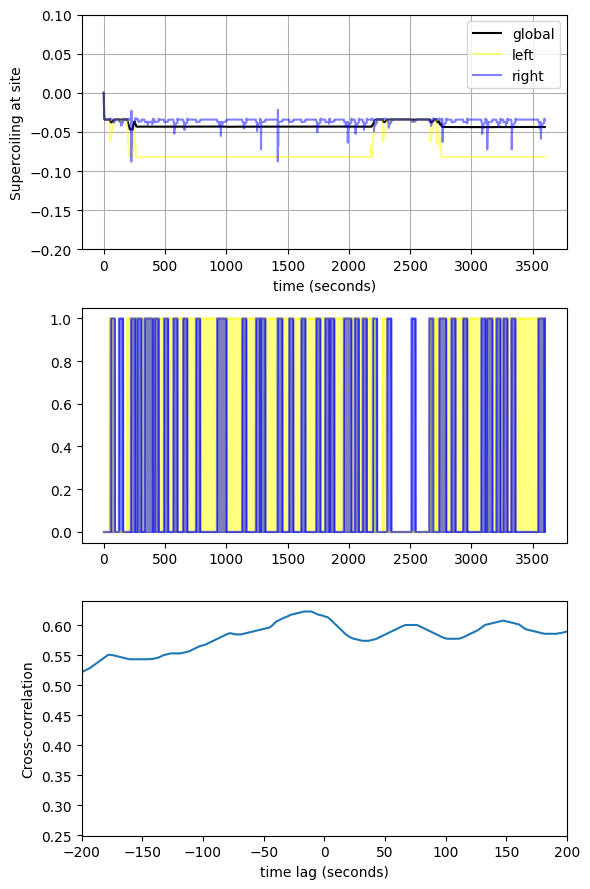

In [17]:
# Load dataframes
sites_df = pd.read_csv(my_circuit.name+'_'+output_prefix+'_sites_df.csv', sep=',')
enzymes_df = pd.read_csv(my_circuit.name+'_'+output_prefix+'_enzymes_df.csv', sep=',')
environment_df = pd.read_csv(my_circuit.name+'_'+output_prefix+'_environment_df.csv', sep=',')

# This time, let's put all the plots in one figure
gene_names = ['left', 'right']
gene_colors = {'left': 'yellow', 'right': 'blue'}
fig, axs = plt.subplots(3, figsize=(6,9), tight_layout=True)

# Plot supercoiling
vs.plot_supercoiling_profiles(my_circuit, sites_df, colors=gene_colors, axs=axs[0])#, only_global=True)

# Plot elongation signal
signals = an.build_elongation_signal_stages(enzymes_df, gene_names)
time = np.arange(0, my_circuit.dt * len(signals[0]), my_circuit.dt)
y_0s = time * 0.0
for i, signal in enumerate(signals):
    name = gene_names[i]
    axs[1].plot(time, signal, color=gene_colors[name], label=name, alpha=0.5)
    axs[1].fill_between(time, signal, y_0s, color=gene_colors[name], alpha=0.5)

# Plot cross correlation
crossmatrix, lag =  an.cross_correlation_hmatrix(signals, dt)
my_label = f' lag={lag[np.argmax(crossmatrix[0, 1, :])]:.2f}s'
axs[2].plot(lag, crossmatrix[0, 1, :], label=my_label)
axs[2].set_ylabel('Cross-correlation')
axs[2].set_xlabel('time lag (seconds)')
axs[2].set_xlim(-200, 200)

#vs.plot_cross_correlation_with_site(my_circuit, sites_df, ref_name='left', axs=axs[2])

# And let's calculate the production rate:
for gene_name in gene_names:
    mask = environment_df['name'] == gene_name
    transcripts = environment_df[mask]['concentration'].iloc[-1]
    print(gene_name + ' gene production rate: ' + str(transcripts/(frames*dt)) +' transcript/seconds')

Here are some observations:
- Supercoiling profiles are more subtle due to brief RNAP stalling and the continuum activity of topoisomerases quickly removing excesive supercoils.
- Signal profiles are narrower again due to fast elongation, accelerated by the continuum action of topoisomerases.
- Cross-correlation is clearer again.

## Last Takeaway Notes:
- You can mix and match models, however, the transcription stages models depend on each other and might not work well with others.
- Using stochastic topoisomerase models and the transcription stages may not perform well with some site parameterisations (gene behaviour) and circuits designs, as these models are highly sensitive to supercoiling accumulation which directly depends on the system design and how often elongation happens. This could lead to a saturation of elongating RNAPs.
- Some models offer advantages over the others, for example, the continuum topoisomerase models offer a fast simulation where the interaction between different components can be analysed.